## פרויקט ל פרקינסון לפי מאפייני קול

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Importing the data

In [6]:
PD = pd.read_csv('Parkinsson disease.csv')

In [7]:
PD.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
PD.info() # No nulls in data - Good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
PD.rename(columns={'status':'parkinson'}, inplace=True) # Rename label column: "status" to "parkinson" - More intuitive.

In [10]:
PD['parkinson'].value_counts() # 1 = Parkinson ; 0 = Healthy

1    147
0     48
Name: parkinson, dtype: int64

In [11]:
PD.drop('name',axis=1,inplace=True) # No classification use for name column.
PD.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,parkinson,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
PD['parkinson'] = PD.pop('parkinson') # Move our label to the last column.

# normal distribution

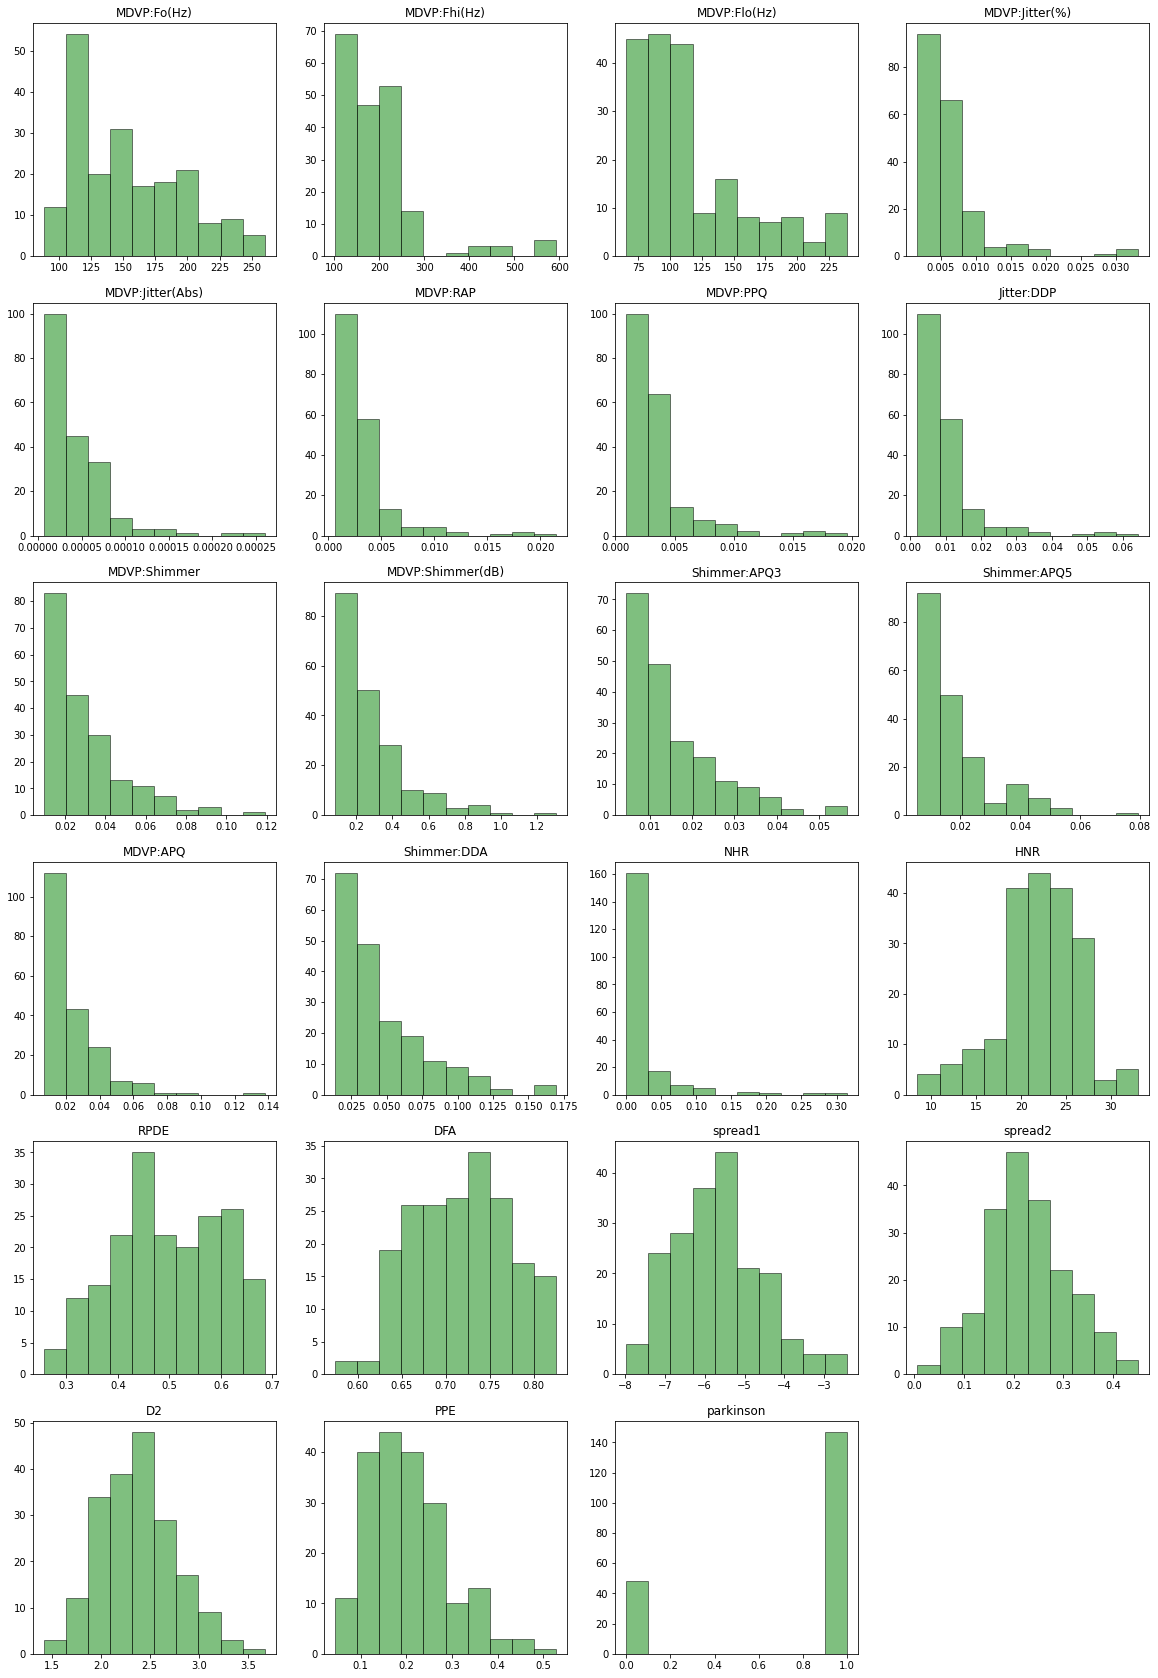

In [13]:
plt.figure(figsize=(20,30))
i = 1
for column in PD.columns:
    plt.subplot(6,4,i)
    plt.hist(PD[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

del i

**Features are not at all highly or super low correlated or - Everything looks well balanced and will mostly contribute to our prediction**

# heatmap

<AxesSubplot:>

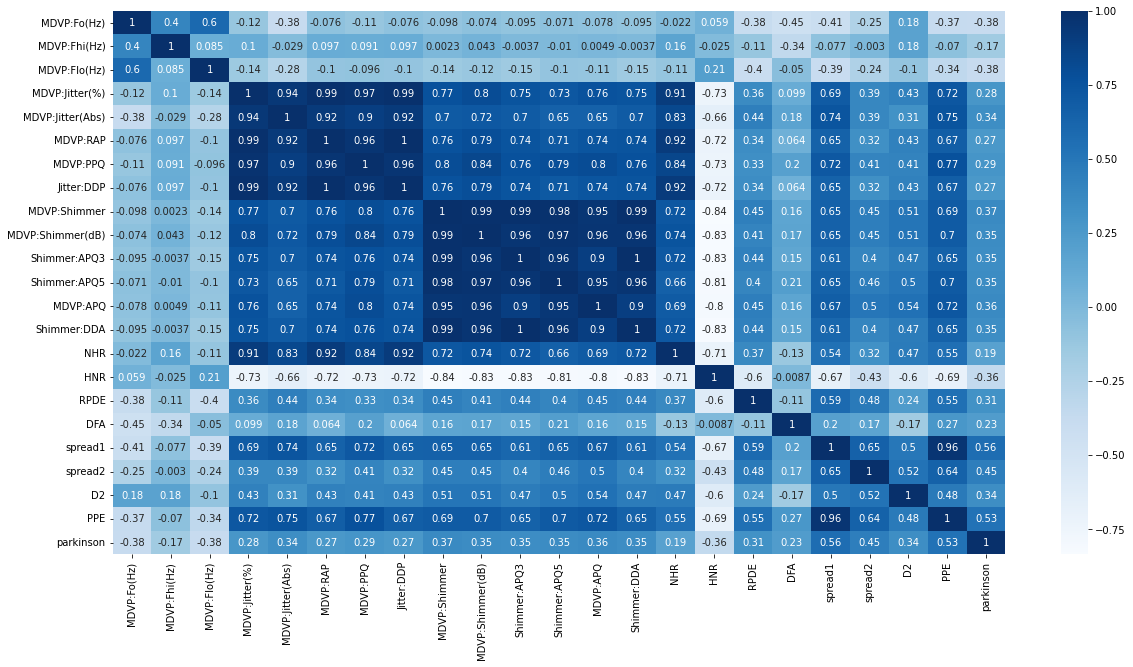

In [14]:
import plotly.express as px
plt.figure(figsize=(20,10)) 
sns.heatmap(PD.corr(), annot=True,cmap='Blues') 


# drop unrelevant data

In [15]:
PD=PD.drop(['MDVP:Fhi(Hz)','NHR'],axis=1) # Remove columns with no correlation to 'parkinson' label.
PD.head()


,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,MDVP:APQ,Shimmer:DDA,HNR,RPDE,DFA,spread1,spread2,D2,PPE,parkinson
0,119.992,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.02971,0.06545,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.04368,0.09403,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.03590,0.08270,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.03772,0.08771,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.04465,0.10470,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Splitting into X (Feature Only Dataframe) and Y (Label Only Dataframe).

In [16]:
X = PD.drop('parkinson',axis=1)
Y = PD['parkinson']

# normalize data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.23, random_state=0) # Train test split.
X_train.shape

(150, 20)

In [18]:
# Scaling the data using the MinMax Scaler.
scaler = MinMaxScaler()
print(X_train)
X_train = scaler.fit_transform(X_train) # Fit the X_train data on the scaler and scale it accordingly 
X_test = scaler.transform(X_test) # Scale the X_test data
type(X_train)
# print(X_train)

     MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
130      120.289       100.209         0.00492          0.000040   0.00269   
122      138.190        83.340         0.00704          0.000050   0.00406   
101      128.451        75.632         0.01551          0.000120   0.00905   
118      178.285        82.063         0.00462          0.000030   0.00157   
92       148.272       142.299         0.00459          0.000030   0.00250   
..           ...           ...             ...               ...       ...   
103      150.258        75.349         0.00248          0.000020   0.00105   
67       136.969        66.004         0.00923          0.000070   0.00507   
117      170.756        79.032         0.00555          0.000030   0.00244   
47       252.455       182.786         0.00185          0.000007   0.00092   
172      110.739       100.139         0.00356          0.000030   0.00170   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shim

numpy.ndarray

# K-Fold

In [19]:
from sklearn.model_selection import cross_val_score
accuarcies=cross_val_score(estimator=KNeighborsClassifier(n_neighbors=5),X=X_train,y=Y_train,cv=10)
print(f" the avg is : {accuarcies.mean()}")
print(f" the standatd division {accuarcies.std()}")

 the avg is : 0.9133333333333334
 the standatd division 0.07333333333333332


# Types:

In [20]:
[type(d) for d in [X_train, Y_train, X_test, Y_test]] # Check which data might be susceptible to incorrect indexing

[numpy.ndarray,
 pandas.core.series.Series,
 numpy.ndarray,
 pandas.core.series.Series]

# sort

In [21]:
# Fix indexing accordingly
Y_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

# SVM model

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 
svc_model = SVC()
svc_model.fit(X_train, Y_train)
y_predict = svc_model.predict(X_test)

svc_model.score(X_test, Y_test) # Accuracy score.



0.9333333333333333

# is there over fitting?

In [23]:
print(svc_model.score(X_train, Y_train)) # Accuracy score.
print(svc_model.score(X_test, Y_test)) # Accuracy score.

0.8733333333333333
0.9333333333333333


# Confusion Matrix of the SVM model

<AxesSubplot:>

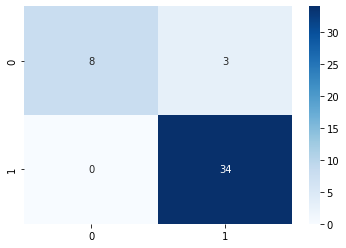

In [24]:
cm = confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [25]:
accuracy_score(Y_test, y_predict)
print(classification_report(Y_test, y_predict))



              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.92      1.00      0.96        34

    accuracy                           0.93        45
   macro avg       0.96      0.86      0.90        45
weighted avg       0.94      0.93      0.93        45



# GRID WITH SVC

In [26]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.5, 1,2,5], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid_svm.fit(X_train, Y_train)
print(grid_svm.best_params_)
print("the score is:" ,grid_svm.score(X_test, Y_test))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.767 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

In [27]:

best_score=grid_svm.best_score_
best_params=grid_svm.best_params_
print("the best score is and their parameters",best_score, best_params)



the best score is and their parameters 0.9333333333333333 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


# GRID with KNN 

In [28]:
param_grid={'n_neighbors':[3,5,7,9] , 'metric':['euclidean','manhattan'], 'p':[1,2,3]}
knn_classifior = KNeighborsClassifier()
grid_model_knn = GridSearchCV(knn_classifior, param_grid, cv=5, scoring='accuracy')
grid_model_knn.fit(X_train, Y_train)
Y_pred = grid_model_knn.predict(X_test)
print(grid_model_knn.best_params_)
print(grid_model_knn.best_score_)


{'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
0.9466666666666669


# Confusion Matrix of KNN

Confusion matrix

 [[11  0]
 [ 3 31]]

True Positives(TP) =  11

True Negatives(TN) =  31

False Positives(FP) =  0

False Negatives(FN) =  3

Classification Accuracy =  0.9333333333333333

Classification Error =  0.06666666666666667

Precision =  1.0

Recall =  0.7857142857142857

F1 Score =  0.88


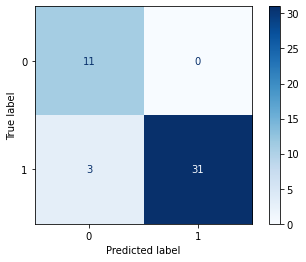

In [29]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

cm = confusion_matrix(Y_test, Y_pred) 
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ',cm[0,0]) 
print('\nTrue Negatives(TN) = ', cm[1,1]) 
print('\nFalse Positives(FP) = ', cm[0,1]) 
print('\nFalse Negatives(FN) = ', cm[1,0])
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy =(TP + TN) / float(TP + TN + FP + FN)
classification_error =(FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
F1_score = 2 * (precision * recall) / float(precision + recall)
print('\nClassification Accuracy = ', classification_accuracy)
print('\nClassification Error = ', classification_error)
print('\nPrecision = ', precision)
print('\nRecall = ', recall)
print('\nF1 Score = ', F1_score)
best_score=grid_model_knn.best_score_
plot_confusion_matrix(grid_model_knn, X_test, Y_test, cmap='Blues')


# Confusion matrix of the SVM

Confusion matrix

 [[11  0]
 [ 3 31]]

True Positives(TP) =  11

True Negatives(TN) =  31

False Positives(FP) =  0

False Negatives(FN) =  3

Classification Accuracy =  0.9333333333333333

Classification Error =  0.06666666666666667

Precision =  1.0

Recall =  0.7857142857142857

F1 Score =  0.88


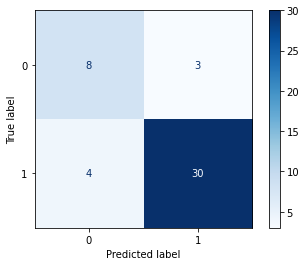

In [30]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

cm = confusion_matrix(Y_test, Y_pred) 
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ',cm[0,0]) 
print('\nTrue Negatives(TN) = ', cm[1,1]) 
print('\nFalse Positives(FP) = ', cm[0,1]) 
print('\nFalse Negatives(FN) = ', cm[1,0])
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy =(TP + TN) / float(TP + TN + FP + FN)
classification_error =(FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
F1_score = 2 * (precision * recall) / float(precision + recall)
print('\nClassification Accuracy = ', classification_accuracy)
print('\nClassification Error = ', classification_error)
print('\nPrecision = ', precision)
print('\nRecall = ', recall)
print('\nF1 Score = ', F1_score)
plot_confusion_matrix(grid_svm, X_test, Y_test, cmap='Blues')


## XGBOOST

In [31]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print("Accuracy of XGBoost: ", accuracy_score(Y_test, y_pred))
print("Confusion Matrix of XGBoost: ", confusion_matrix(Y_test, y_pred))
print("Classification Report of XGBoost: ", classification_report(Y_test, y_pred))


Accuracy of XGBoost:  0.9555555555555556
Confusion Matrix of XGBoost:  [[11  0]
 [ 2 32]]
Classification Report of XGBoost:                precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.94      0.97        34

    accuracy                           0.96        45
   macro avg       0.92      0.97      0.94        45
weighted avg       0.96      0.96      0.96        45



# save the model with the scaler into mongoDB

In [32]:
import pickle


def save_model_to_db(model, client, db, dbconnection, model_name,score,scaler):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)
    pickled_scaler=pickle.dumps(scaler)
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({"model": pickled_model, 'name': model_name, 'created_time':time.time(),"score": score, "scaler": pickled_scaler})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    
    return details


    
save_model_to_db(xgb,'mongodb://localhost:27017',"Parkinson","AI","XGBOOST_MODEL",best_score, scaler)

6357d1ad6df9fb718005801b  saved with this id successfully!


{'inserted_id': ObjectId('6357d1ad6df9fb718005801b'),
 'model_name': 'XGBOOST_MODEL',
 'created_time': 1666699693.508517}

# roc curve

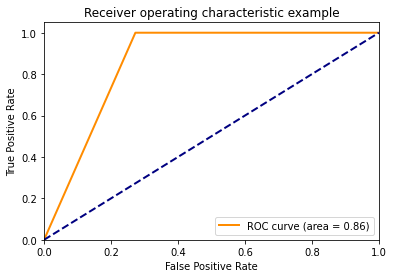

In [33]:
#roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',

            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier=DecisionTreeClassifier()



{'criterion': 'gini', 'max_depth': 5, 'random_state': 50}
0.8333333333333333
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.94      0.94      0.94        34

    accuracy                           0.91        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.91      0.91      0.91        45



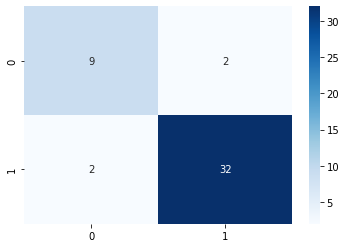

score: 0.9111111111111111
41


[Text(0.4166666666666667, 0.9285714285714286, 'X[19] <= 0.185\ngini = 0.372\nsamples = 150\nvalue = [37, 113]'),
 Text(0.20833333333333334, 0.7857142857142857, 'X[12] <= 0.066\ngini = 0.418\nsamples = 37\nvalue = [26, 11]'),
 Text(0.125, 0.6428571428571429, 'X[1] <= 0.668\ngini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(0.08333333333333333, 0.5, 'X[14] <= 0.591\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.041666666666666664, 0.35714285714285715, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.2916666666666667, 0.6428571428571429, 'X[18] <= 0.696\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.7857142857142857, 'X[17] <= 0.421\ngini = 0.176\nsamples = 113\nvalue = [

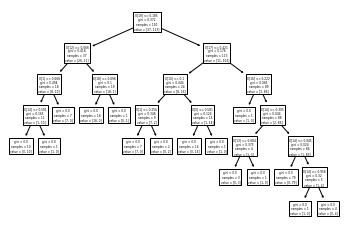

In [35]:
grid_tree_params = {'max_depth': [2,3,4,5,6,7,8,9,10], 'criterion': ['gini', 'entropy'], 'random_state' : [0,50]}
grid_model_tree = GridSearchCV(TreeClassifier, grid_tree_params, cv=5, scoring='accuracy')

TreeClassifier.fit(X_train, Y_train)
y_pred = TreeClassifier.predict(X_test)
grid_model_tree.fit(X_train, Y_train)
print(grid_model_tree.best_params_)
print(grid_model_tree.best_score_)

print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.show()

accuracy_score(Y_test, y_pred)
print("score:" ,accuracy_score(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred, normalize=False))
from sklearn import tree
tree.plot_tree(TreeClassifier.fit(X_train, Y_train)) # Plotting the decision tree

# importing the model and use it on our UI program

In [36]:
import pymongo
def load_saved_model_from_db(model_name, client, db, dbconnection):
    json_data = {}
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    data = mycon.find({'name': model_name})
    
    
    for i in data:
        json_data = i
    #fetching model from db
    pickled_model = json_data["model"]
    
    return pickle.loads(pickled_model), pickle.loads(json_data['scaler'])

model, scaler=load_saved_model_from_db('XGBOOST_MODEL','mongodb://localhost:27017',"Parkinson","AI")


# QT 

In [40]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'untitled.ui'
#
# Created by: PyQt5 UI code generator 5.15.6
#
# WARNING: Any manual changes made to this file will be lost when pyuic5 is
# run again.  Do not edit this file unless you know what you are doing.



from PyQt6 import QtCore, QtGui, QtWidgets
import numpy as np
from PyQt6.QtWidgets import QMessageBox


class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(734, 601)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.mdvpfo = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpfo.setGeometry(QtCore.QRect(190, 30, 71, 31))
        self.mdvpfo.setObjectName("mdvpfo")
        self.mdvpRAP = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpRAP.setGeometry(QtCore.QRect(190, 150, 71, 31))
        self.mdvpRAP.setObjectName("mdvpRAP")
        self.jitterAbs = QtWidgets.QTextEdit(self.centralwidget)
        self.jitterAbs.setGeometry(QtCore.QRect(190, 120, 71, 31))
        self.jitterAbs.setObjectName("jitterAbs")
        self.mdvpSHIMMER = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpSHIMMER.setGeometry(QtCore.QRect(190, 180, 71, 31))
        self.mdvpSHIMMER.setObjectName("mdvpSHIMMER")
        self.mdvpflo_hz = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpflo_hz.setGeometry(QtCore.QRect(190, 60, 71, 31))
        self.mdvpflo_hz.setObjectName("mdvpflo_hz")
        self.textBrowser_5 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_5.setGeometry(QtCore.QRect(10, 150, 181, 31))
        self.textBrowser_5.setObjectName("textBrowser_5")
        self.mdvp_hitterpr = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvp_hitterpr.setGeometry(QtCore.QRect(190, 90, 71, 31))
        self.mdvp_hitterpr.setObjectName("mdvp_hitterpr")
        self.textBrowser_9 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_9.setGeometry(QtCore.QRect(10, 240, 181, 31))
        self.textBrowser_9.setObjectName("textBrowser_9")
        self.textBrowser_10 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_10.setGeometry(QtCore.QRect(10, 270, 181, 31))
        self.textBrowser_10.setObjectName("textBrowser_10")
        self.textBrowser_11 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_11.setGeometry(QtCore.QRect(10, 210, 181, 31))
        self.textBrowser_11.setObjectName("textBrowser_11")
        self.textBrowser_12 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_12.setGeometry(QtCore.QRect(10, 180, 181, 31))
        self.textBrowser_12.setObjectName("textBrowser_12")
        self.textBrowser_8 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_8.setGeometry(QtCore.QRect(10, 120, 181, 31))
        self.textBrowser_8.setObjectName("textBrowser_8")
        self.textBrowser_13 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_13.setGeometry(QtCore.QRect(10, 90, 181, 31))
        self.textBrowser_13.setObjectName("textBrowser_13")
        self.textBrowser_14 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_14.setGeometry(QtCore.QRect(10, 60, 181, 31))
        self.textBrowser_14.setObjectName("textBrowser_14")
        self.textBrowser_15 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_15.setGeometry(QtCore.QRect(10, 30, 181, 31))
        self.textBrowser_15.setObjectName("textBrowser_15")
        self.textBrowser_16 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_16.setGeometry(QtCore.QRect(320, 210, 181, 31))
        self.textBrowser_16.setObjectName("textBrowser_16")
        self.textBrowser_17 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_17.setGeometry(QtCore.QRect(320, 240, 181, 31))
        self.textBrowser_17.setObjectName("textBrowser_17")
        self.textBrowser_18 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_18.setGeometry(QtCore.QRect(320, 270, 181, 31))
        self.textBrowser_18.setObjectName("textBrowser_18")
        self.textBrowser_19 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_19.setGeometry(QtCore.QRect(200, 340, 181, 31))
        self.textBrowser_19.setObjectName("textBrowser_19")
        self.textBrowser_20 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_20.setGeometry(QtCore.QRect(320, 30, 181, 31))
        self.textBrowser_20.setObjectName("textBrowser_20")
        self.textBrowser_21 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_21.setGeometry(QtCore.QRect(10, 370, 141, 31))
        self.textBrowser_21.setObjectName("textBrowser_21")
        self.textEdit_2 = QtWidgets.QTextEdit(self.centralwidget)
        self.textEdit_2.setGeometry(QtCore.QRect(10, 410, 241, 41))
        self.textEdit_2.setObjectName("textEdit_2")
        self.textBrowser_22 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_22.setGeometry(QtCore.QRect(320, 60, 181, 31))
        self.textBrowser_22.setObjectName("textBrowser_22")
        self.textBrowser_23 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_23.setGeometry(QtCore.QRect(320, 90, 181, 31))
        self.textBrowser_23.setObjectName("textBrowser_23")
        self.textBrowser_24 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_24.setGeometry(QtCore.QRect(320, 120, 181, 31))
        self.textBrowser_24.setObjectName("textBrowser_24")
        self.textBrowser_25 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_25.setGeometry(QtCore.QRect(320, 150, 181, 31))
        self.textBrowser_25.setObjectName("textBrowser_25")
        self.textBrowser_26 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_26.setGeometry(QtCore.QRect(320, 180, 181, 31))
        self.textBrowser_26.setObjectName("textBrowser_26")
        self.MDVPAPQ = QtWidgets.QTextEdit(self.centralwidget)
        self.MDVPAPQ.setGeometry(QtCore.QRect(500, 240, 71, 31))
        self.MDVPAPQ.setObjectName("MDVPAPQ")
        self.SHIMMERAPQ3 = QtWidgets.QTextEdit(self.centralwidget)
        self.SHIMMERAPQ3.setGeometry(QtCore.QRect(190, 270, 71, 31))
        self.SHIMMERAPQ3.setObjectName("SHIMMERAPQ3")
        self.SHIMMERDDA = QtWidgets.QTextEdit(self.centralwidget)
        self.SHIMMERDDA.setGeometry(QtCore.QRect(500, 270, 71, 31))
        self.SHIMMERDDA.setObjectName("SHIMMERDDA")
        self.SHIMMERAPq5 = QtWidgets.QTextEdit(self.centralwidget)
        self.SHIMMERAPq5.setGeometry(QtCore.QRect(500, 210, 71, 31))
        self.SHIMMERAPq5.setObjectName("SHIMMERAPq5")
        self.mdvpDDP = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpDDP.setGeometry(QtCore.QRect(190, 210, 71, 31))
        self.mdvpDDP.setObjectName("mdvpDDP")
        self.mdvp_SHIMMERDB = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvp_SHIMMERDB.setGeometry(QtCore.QRect(190, 240, 71, 31))
        self.mdvp_SHIMMERDB.setObjectName("mdvp_SHIMMERDB")
        self.D2 = QtWidgets.QTextEdit(self.centralwidget)
        self.D2.setGeometry(QtCore.QRect(500, 150, 71, 31))
        self.D2.setObjectName("D2")
        self.SPREAD1 = QtWidgets.QTextEdit(self.centralwidget)
        self.SPREAD1.setGeometry(QtCore.QRect(500, 90, 71, 31))
        self.SPREAD1.setObjectName("SPREAD1")
        self.PPE = QtWidgets.QTextEdit(self.centralwidget)
        self.PPE.setGeometry(QtCore.QRect(500, 180, 71, 31))
        self.PPE.setObjectName("PPE")
        self.SPREAD2 = QtWidgets.QTextEdit(self.centralwidget)
        self.SPREAD2.setGeometry(QtCore.QRect(500, 120, 71, 31))
        self.SPREAD2.setObjectName("SPREAD2")
        self.RPDE = QtWidgets.QTextEdit(self.centralwidget)
        self.RPDE.setGeometry(QtCore.QRect(500, 30, 71, 31))
        self.RPDE.setObjectName("RPDE")
        self.DFA = QtWidgets.QTextEdit(self.centralwidget)
        self.DFA.setGeometry(QtCore.QRect(500, 60, 71, 31))
        self.DFA.setObjectName("DFA")
        self.HNR = QtWidgets.QTextEdit(self.centralwidget)
        self.HNR.setGeometry(QtCore.QRect(380, 340, 71, 31))
        self.HNR.setObjectName("HNR")
        self.textBrowser_27 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_27.setGeometry(QtCore.QRect(10, 460, 141, 31))
        self.textBrowser_27.setObjectName("textBrowser_27")
        self.textEdit_3 = QtWidgets.QTextEdit(self.centralwidget)
        self.textEdit_3.setGeometry(QtCore.QRect(10, 490, 241, 41))
        self.textEdit_3.setObjectName("textEdit_3")
        self.pushButton = QtWidgets.QPushButton(self.centralwidget,clicked = lambda: self.check())
        self.pushButton.setGeometry(QtCore.QRect(520, 430, 113, 32))
        self.pushButton.setObjectName("pushButton")
        self.textBrowser_28 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_28.setGeometry(QtCore.QRect(200, 310, 181, 31))
        self.textBrowser_28.setObjectName("textBrowser_28")
        self.mdvpppq = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpppq.setGeometry(QtCore.QRect(380, 310, 71, 31))
        self.mdvpppq.setObjectName("mdvpppq")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 734, 37))
        self.menubar.setObjectName("menubar")
        self.menuParkinson_predicter = QtWidgets.QMenu(self.menubar)
        self.menuParkinson_predicter.setObjectName("menuParkinson_predicter")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.menuParkinson_predicter.addSeparator()
        self.menuParkinson_predicter.addSeparator()
        self.menubar.addAction(self.menuParkinson_predicter.menuAction())

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
    
# start region
    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.textBrowser_5.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:RAP</span></p></body></html>"))
        self.textBrowser_9.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Shimmer(dB)</span></p></body></html>"))
        self.textBrowser_10.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Shimmer:APQ3</span></p></body></html>"))
        self.textBrowser_11.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">jitter:DDP</span></p></body></html>"))
        self.textBrowser_12.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Shimmer</span></p></body></html>"))
        self.textBrowser_8.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Jitter(ABS)</span></p></body></html>"))
        self.textBrowser_13.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:jitter(%)</span></p></body></html>"))
        self.textBrowser_14.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:FLO(HZ)</span></p></body></html>"))
        self.textBrowser_15.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Fo(HZ)</span></p></body></html>"))
        self.textBrowser_16.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Shimmer:APQ5</span></p></body></html>"))
        self.textBrowser_17.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:APQ</span></p></body></html>"))
        self.textBrowser_18.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Shimmer:DDA</span></p></body></html>"))
        self.textBrowser_19.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">HNR</span></p></body></html>"))
        self.textBrowser_20.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">RPDE</span></p></body></html>"))
        self.textBrowser_21.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Pacinte name:</span></p></body></html>"))
        self.textBrowser_22.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">DFA</span></p></body></html>"))
        self.textBrowser_23.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">spread1</span></p></body></html>"))
        self.textBrowser_24.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">spread2</span></p></body></html>"))
        self.textBrowser_25.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">D2</span></p></body></html>"))
        self.textBrowser_26.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">PPE</span></p></body></html>"))
        self.textBrowser_27.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">ID:</span></p></body></html>"))
        self.pushButton.setText(_translate("MainWindow", "Enter"))
        self.textBrowser_28.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">mdvpPPPQ</span></p></body></html>"))
        self.menuParkinson_predicter.setTitle(_translate("MainWindow", "Parkinson predicter"))
# end region

    def check(self):
        x_test1 = np.array([float(self.mdvpfo.toPlainText()), float(self.mdvpflo_hz.toPlainText()), float(self.mdvp_hitterpr.toPlainText()), float(self.jitterAbs.toPlainText()), float(self.mdvpRAP.toPlainText()), float(self.mdvpppq.toPlainText()),float(self.mdvpDDP.toPlainText()),float(self.mdvpSHIMMER.toPlainText()),float(self.mdvp_SHIMMERDB.toPlainText()), float(self.SHIMMERAPQ3.toPlainText()),float(self.SHIMMERAPq5.toPlainText()), float(self.MDVPAPQ.toPlainText()),float(self.SHIMMERDDA.toPlainText()),float(self.HNR.toPlainText()), float(self.RPDE.toPlainText()),float(self.DFA.toPlainText()),float(self.SPREAD1.toPlainText()),float(self.SPREAD2.toPlainText()),float(self.D2.toPlainText()),float(self.PPE.toPlainText())]).reshape(1, -1) # X is a matrix of features
        print(x_test1)

        # enter flask server ip address
        print(model.predict(scaler.transform(x_test1)))
        if model.predict(scaler.transform(x_test1))==[1]:
                print("yes")
                from PyQt6.QtWidgets import QMessageBox
                msg=QMessageBox()
                msg.setWindowTitle("resault")
                msg.setText("patient is sick")
                x=msg.exec()
        else:
                from PyQt6.QtWidgets import QMessageBox
                msg=QMessageBox()
                msg.setWindowTitle("resault")
                msg.setText("patient  isn't sick")
                x=msg.exec()
        
    
        
        

        
        

        


if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec())




SystemExit: 0

In [41]:
from flask import Flask, jsonify, request

from PyQt6 import QtCore, QtGui, QtWidgets
import numpy as np
from PyQt6.QtWidgets import QMessageBox


class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(734, 601)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.mdvpfo = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpfo.setGeometry(QtCore.QRect(190, 30, 71, 31))
        self.mdvpfo.setObjectName("mdvpfo")
        self.mdvpRAP = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpRAP.setGeometry(QtCore.QRect(190, 150, 71, 31))
        self.mdvpRAP.setObjectName("mdvpRAP")
        self.jitterAbs = QtWidgets.QTextEdit(self.centralwidget)
        self.jitterAbs.setGeometry(QtCore.QRect(190, 120, 71, 31))
        self.jitterAbs.setObjectName("jitterAbs")
        self.mdvpSHIMMER = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpSHIMMER.setGeometry(QtCore.QRect(190, 180, 71, 31))
        self.mdvpSHIMMER.setObjectName("mdvpSHIMMER")
        self.mdvpflo_hz = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpflo_hz.setGeometry(QtCore.QRect(190, 60, 71, 31))
        self.mdvpflo_hz.setObjectName("mdvpflo_hz")
        self.textBrowser_5 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_5.setGeometry(QtCore.QRect(10, 150, 181, 31))
        self.textBrowser_5.setObjectName("textBrowser_5")
        self.mdvp_hitterpr = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvp_hitterpr.setGeometry(QtCore.QRect(190, 90, 71, 31))
        self.mdvp_hitterpr.setObjectName("mdvp_hitterpr")
        self.textBrowser_9 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_9.setGeometry(QtCore.QRect(10, 240, 181, 31))
        self.textBrowser_9.setObjectName("textBrowser_9")
        self.textBrowser_10 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_10.setGeometry(QtCore.QRect(10, 270, 181, 31))
        self.textBrowser_10.setObjectName("textBrowser_10")
        self.textBrowser_11 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_11.setGeometry(QtCore.QRect(10, 210, 181, 31))
        self.textBrowser_11.setObjectName("textBrowser_11")
        self.textBrowser_12 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_12.setGeometry(QtCore.QRect(10, 180, 181, 31))
        self.textBrowser_12.setObjectName("textBrowser_12")
        self.textBrowser_8 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_8.setGeometry(QtCore.QRect(10, 120, 181, 31))
        self.textBrowser_8.setObjectName("textBrowser_8")
        self.textBrowser_13 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_13.setGeometry(QtCore.QRect(10, 90, 181, 31))
        self.textBrowser_13.setObjectName("textBrowser_13")
        self.textBrowser_14 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_14.setGeometry(QtCore.QRect(10, 60, 181, 31))
        self.textBrowser_14.setObjectName("textBrowser_14")
        self.textBrowser_15 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_15.setGeometry(QtCore.QRect(10, 30, 181, 31))
        self.textBrowser_15.setObjectName("textBrowser_15")
        self.textBrowser_16 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_16.setGeometry(QtCore.QRect(320, 210, 181, 31))
        self.textBrowser_16.setObjectName("textBrowser_16")
        self.textBrowser_17 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_17.setGeometry(QtCore.QRect(320, 240, 181, 31))
        self.textBrowser_17.setObjectName("textBrowser_17")
        self.textBrowser_18 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_18.setGeometry(QtCore.QRect(320, 270, 181, 31))
        self.textBrowser_18.setObjectName("textBrowser_18")
        self.textBrowser_19 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_19.setGeometry(QtCore.QRect(200, 340, 181, 31))
        self.textBrowser_19.setObjectName("textBrowser_19")
        self.textBrowser_20 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_20.setGeometry(QtCore.QRect(320, 30, 181, 31))
        self.textBrowser_20.setObjectName("textBrowser_20")
        self.textBrowser_21 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_21.setGeometry(QtCore.QRect(10, 370, 141, 31))
        self.textBrowser_21.setObjectName("textBrowser_21")
        self.textEdit_2 = QtWidgets.QTextEdit(self.centralwidget)
        self.textEdit_2.setGeometry(QtCore.QRect(10, 410, 241, 41))
        self.textEdit_2.setObjectName("textEdit_2")
        self.textBrowser_22 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_22.setGeometry(QtCore.QRect(320, 60, 181, 31))
        self.textBrowser_22.setObjectName("textBrowser_22")
        self.textBrowser_23 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_23.setGeometry(QtCore.QRect(320, 90, 181, 31))
        self.textBrowser_23.setObjectName("textBrowser_23")
        self.textBrowser_24 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_24.setGeometry(QtCore.QRect(320, 120, 181, 31))
        self.textBrowser_24.setObjectName("textBrowser_24")
        self.textBrowser_25 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_25.setGeometry(QtCore.QRect(320, 150, 181, 31))
        self.textBrowser_25.setObjectName("textBrowser_25")
        self.textBrowser_26 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_26.setGeometry(QtCore.QRect(320, 180, 181, 31))
        self.textBrowser_26.setObjectName("textBrowser_26")
        self.MDVPAPQ = QtWidgets.QTextEdit(self.centralwidget)
        self.MDVPAPQ.setGeometry(QtCore.QRect(500, 240, 71, 31))
        self.MDVPAPQ.setObjectName("MDVPAPQ")
        self.SHIMMERAPQ3 = QtWidgets.QTextEdit(self.centralwidget)
        self.SHIMMERAPQ3.setGeometry(QtCore.QRect(190, 270, 71, 31))
        self.SHIMMERAPQ3.setObjectName("SHIMMERAPQ3")
        self.SHIMMERDDA = QtWidgets.QTextEdit(self.centralwidget)
        self.SHIMMERDDA.setGeometry(QtCore.QRect(500, 270, 71, 31))
        self.SHIMMERDDA.setObjectName("SHIMMERDDA")
        self.SHIMMERAPq5 = QtWidgets.QTextEdit(self.centralwidget)
        self.SHIMMERAPq5.setGeometry(QtCore.QRect(500, 210, 71, 31))
        self.SHIMMERAPq5.setObjectName("SHIMMERAPq5")
        self.mdvpDDP = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpDDP.setGeometry(QtCore.QRect(190, 210, 71, 31))
        self.mdvpDDP.setObjectName("mdvpDDP")
        self.mdvp_SHIMMERDB = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvp_SHIMMERDB.setGeometry(QtCore.QRect(190, 240, 71, 31))
        self.mdvp_SHIMMERDB.setObjectName("mdvp_SHIMMERDB")
        self.D2 = QtWidgets.QTextEdit(self.centralwidget)
        self.D2.setGeometry(QtCore.QRect(500, 150, 71, 31))
        self.D2.setObjectName("D2")
        self.SPREAD1 = QtWidgets.QTextEdit(self.centralwidget)
        self.SPREAD1.setGeometry(QtCore.QRect(500, 90, 71, 31))
        self.SPREAD1.setObjectName("SPREAD1")
        self.PPE = QtWidgets.QTextEdit(self.centralwidget)
        self.PPE.setGeometry(QtCore.QRect(500, 180, 71, 31))
        self.PPE.setObjectName("PPE")
        self.SPREAD2 = QtWidgets.QTextEdit(self.centralwidget)
        self.SPREAD2.setGeometry(QtCore.QRect(500, 120, 71, 31))
        self.SPREAD2.setObjectName("SPREAD2")
        self.RPDE = QtWidgets.QTextEdit(self.centralwidget)
        self.RPDE.setGeometry(QtCore.QRect(500, 30, 71, 31))
        self.RPDE.setObjectName("RPDE")
        self.DFA = QtWidgets.QTextEdit(self.centralwidget)
        self.DFA.setGeometry(QtCore.QRect(500, 60, 71, 31))
        self.DFA.setObjectName("DFA")
        self.HNR = QtWidgets.QTextEdit(self.centralwidget)
        self.HNR.setGeometry(QtCore.QRect(380, 340, 71, 31))
        self.HNR.setObjectName("HNR")
        self.textBrowser_27 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_27.setGeometry(QtCore.QRect(10, 460, 141, 31))
        self.textBrowser_27.setObjectName("textBrowser_27")
        self.textEdit_3 = QtWidgets.QTextEdit(self.centralwidget)
        self.textEdit_3.setGeometry(QtCore.QRect(10, 490, 241, 41))
        self.textEdit_3.setObjectName("textEdit_3")
        self.pushButton = QtWidgets.QPushButton(self.centralwidget,clicked = lambda: self.check())
        self.pushButton.setGeometry(QtCore.QRect(520, 430, 113, 32))
        self.pushButton.setObjectName("pushButton")
        self.textBrowser_28 = QtWidgets.QTextBrowser(self.centralwidget)
        self.textBrowser_28.setGeometry(QtCore.QRect(200, 310, 181, 31))
        self.textBrowser_28.setObjectName("textBrowser_28")
        self.mdvpppq = QtWidgets.QTextEdit(self.centralwidget)
        self.mdvpppq.setGeometry(QtCore.QRect(380, 310, 71, 31))
        self.mdvpppq.setObjectName("mdvpppq")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 734, 37))
        self.menubar.setObjectName("menubar")
        self.menuParkinson_predicter = QtWidgets.QMenu(self.menubar)
        self.menuParkinson_predicter.setObjectName("menuParkinson_predicter")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.menuParkinson_predicter.addSeparator()
        self.menuParkinson_predicter.addSeparator()
        self.menubar.addAction(self.menuParkinson_predicter.menuAction())

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
    
# start region
    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.textBrowser_5.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:RAP</span></p></body></html>"))
        self.textBrowser_9.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Shimmer(dB)</span></p></body></html>"))
        self.textBrowser_10.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Shimmer:APQ3</span></p></body></html>"))
        self.textBrowser_11.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">jitter:DDP</span></p></body></html>"))
        self.textBrowser_12.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Shimmer</span></p></body></html>"))
        self.textBrowser_8.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Jitter(ABS)</span></p></body></html>"))
        self.textBrowser_13.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:jitter(%)</span></p></body></html>"))
        self.textBrowser_14.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:FLO(HZ)</span></p></body></html>"))
        self.textBrowser_15.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:Fo(HZ)</span></p></body></html>"))
        self.textBrowser_16.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Shimmer:APQ5</span></p></body></html>"))
        self.textBrowser_17.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">MDVP:APQ</span></p></body></html>"))
        self.textBrowser_18.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Shimmer:DDA</span></p></body></html>"))
        self.textBrowser_19.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">HNR</span></p></body></html>"))
        self.textBrowser_20.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">RPDE</span></p></body></html>"))
        self.textBrowser_21.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">Pacinte name:</span></p></body></html>"))
        self.textBrowser_22.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">DFA</span></p></body></html>"))
        self.textBrowser_23.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">spread1</span></p></body></html>"))
        self.textBrowser_24.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">spread2</span></p></body></html>"))
        self.textBrowser_25.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">D2</span></p></body></html>"))
        self.textBrowser_26.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">PPE</span></p></body></html>"))
        self.textBrowser_27.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">ID:</span></p></body></html>"))
        self.pushButton.setText(_translate("MainWindow", "Enter"))
        self.textBrowser_28.setHtml(_translate("MainWindow", "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0//EN\" \"http://www.w3.org/TR/REC-html40/strict.dtd\">\n"
"<html><head><meta name=\"qrichtext\" content=\"1\" /><style type=\"text/css\">\n"
"p, li { white-space: pre-wrap; }\n"
"</style></head><body style=\" font-family:\'.AppleSystemUIFont\'; font-size:13pt; font-weight:400; font-style:normal;\">\n"
"<p style=\" margin-top:0px; margin-bottom:0px; margin-left:0px; margin-right:0px; -qt-block-indent:0; text-indent:0px;\"><span style=\" font-size:18pt;\">mdvpPPPQ</span></p></body></html>"))
        self.menuParkinson_predicter.setTitle(_translate("MainWindow", "Parkinson predicter"))
# end region


app = Flask(__name__)
# curl -v http://localhost:8080/ui
@app.route('/ui', methods=['GET'])
def get_ui():
    ui=Ui_MainWindow()
    ui.setupUi(MainWindow)
    #sys.exit(app.exec())
    return MainWindow.show()




# curl --header "Content-Type: application/json" --request POST --data '{"name": "Product 3"}' -v http://localhost:8080/checksick
@app.route('/checksick', methods=['POST'])
def post_sick():

    ## how to enter the check function into the flask######
    # Retrieve the product from the request body
    request_data_sick = request.json # list with all the data
    # np.array([float(self.mdvpfo.toPlainText()), float(self.mdvpflo_hz.toPlainText()), float(self.mdvp_hitterpr.toPlainText()), float(self.jitterAbs.toPlainText()), float(self.mdvpRAP.toPlainText()), float(self.mdvpppq.toPlainText()),float(self.mdvpDDP.toPlainText()),float(self.mdvpSHIMMER.toPlainText()),float(self.mdvp_SHIMMERDB.toPlainText()), float(self.SHIMMERAPQ3.toPlainText()),float(self.SHIMMERAPq5.toPlainText()), float(self.MDVPAPQ.toPlainText()),float(self.SHIMMERDDA.toPlainText()),float(self.HNR.toPlainText()), float(self.RPDE.toPlainText()),float(self.DFA.toPlainText()),float(self.SPREAD1.toPlainText()),float(self.SPREAD2.toPlainText()),float(self.D2.toPlainText()),float(self.PPE.toPlainText())]).reshape(1, -1) # X is a matrix of features
    Ui_MainWindow()
    ui, sick = Ui_MainWindow()
    check_sick = request_data_sick.reshape(1, -1)

    if model.predict(check_sick)==[1]:
                print("yes")
                from PyQt6.QtWidgets import QMessageBox
                msg=QMessageBox()
                msg.setWindowTitle("resault")
                msg.setText("patient is sick")
                x=msg.exec()
                return jsonify({'message': 'patient is sick'})
    else:
                from PyQt6.QtWidgets import QMessageBox
                msg=QMessageBox()
                msg.setWindowTitle("resault")
                msg.setText("patient isn't sick")
                x=msg.exec()
                return jsonify({'message': 'patient  isn"t sick'})
        
  



if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=8080)
# will use port 500 accessible from external to our computer if not it will use localhost


 * Serving Flask app '__main__'
 * Debug mode: on


Address already in use
Port 8080 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 